In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from analysis.datasets import load_entsoe
from analysis.splits import to_train_validation_test_data
from analysis.transformations import scale_power_data


# plots log power + epsilon = 1e-5

In [2]:
entsoe = load_entsoe()
train, validation, test = to_train_validation_test_data(entsoe, "2022-12-31 23:45:00", "2023-12-31 23:45:00")
data = pd.concat([train, validation])
data = scale_power_data(data)
log_power = data['power'].copy()

Data loaded and transformed successfully. Shape of DataFrame: (78912, 22)
# of training observations: 245472 | 77.77%
# of validation observations: 35040 | 11.10%
# of test observations: 35133 | 11.13%


(array([8.00000e+00, 2.90000e+01, 4.70000e+01, 1.72000e+02, 1.22100e+03,
        5.93200e+03, 2.53780e+04, 6.82210e+04, 1.07128e+05, 7.23760e+04]),
 array([-11.51292546, -10.36355618,  -9.21418689,  -8.0648176 ,
         -6.91544831,  -5.76607903,  -4.61670974,  -3.46734045,
         -2.31797116,  -1.16860188,  -0.01923259]),
 <BarContainer object of 10 artists>)

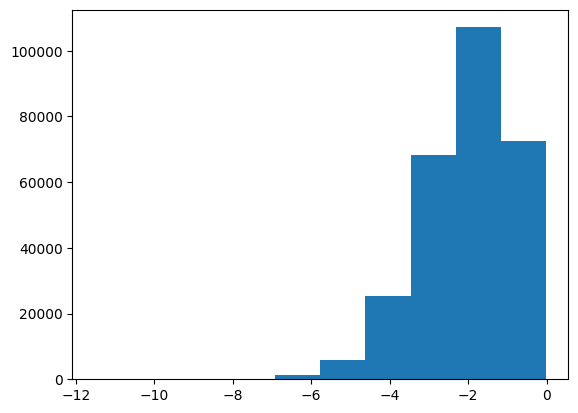

In [4]:
plt.hist(log_power)

In [5]:
_, bounds= pd.qcut(log_power, q=99, retbins=True)
bounds

array([-11.51292546,  -5.29631936,  -4.81248381,  -4.52510938,
        -4.32411295,  -4.16437579,  -4.02997885,  -3.90274267,
        -3.78469094,  -3.6861303 ,  -3.59641825,  -3.51409604,
        -3.43438317,  -3.36055799,  -3.29022967,  -3.2245241 ,
        -3.16287085,  -3.10742653,  -3.05240223,  -2.99906724,
        -2.94843342,  -2.89810393,  -2.85018658,  -2.80737992,
        -2.76539583,  -2.72420648,  -2.68378523,  -2.64410653,
        -2.60276057,  -2.56153109,  -2.52340047,  -2.48455142,
        -2.44647584,  -2.41045202,  -2.37378418,  -2.33963358,
        -2.30661083,  -2.27292921,  -2.23979258,  -2.20664944,
        -2.17301817,  -2.14148217,  -2.10896971,  -2.07701156,
        -2.04513333,  -2.01335863,  -1.98213549,  -1.95020229,
        -1.91845579,  -1.88729779,  -1.85708136,  -1.82811718,
        -1.79712561,  -1.76672144,  -1.73554483,  -1.7053109 ,
        -1.67470768,  -1.645623  ,  -1.6158792 ,  -1.58498349,
        -1.55473529,  -1.52294456,  -1.49344209,  -1.46

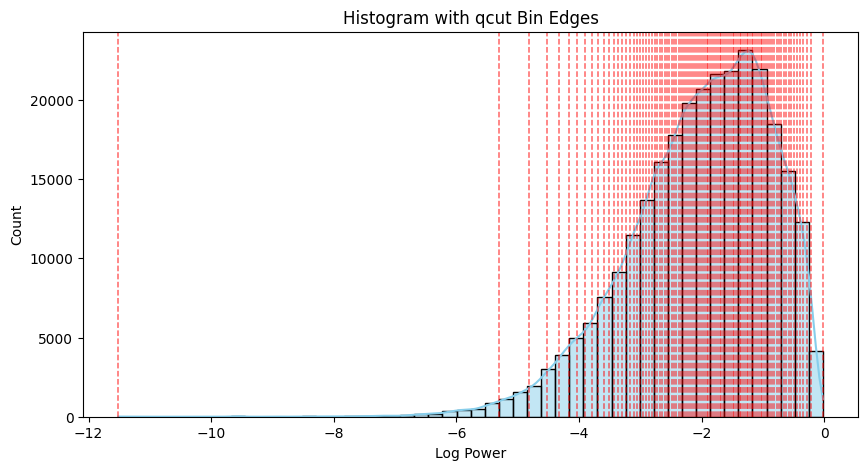

In [6]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(log_power, bins=50, kde=True, color='skyblue', edgecolor='black')

# Overlay bin edges as vertical lines
for edge in bounds:
    plt.axvline(edge, color='red', linestyle='dashed', alpha=0.6, linewidth=1.1)

plt.xlabel("Log Power")
plt.ylabel("Count")
plt.title("Histogram with qcut Bin Edges")
plt.show()

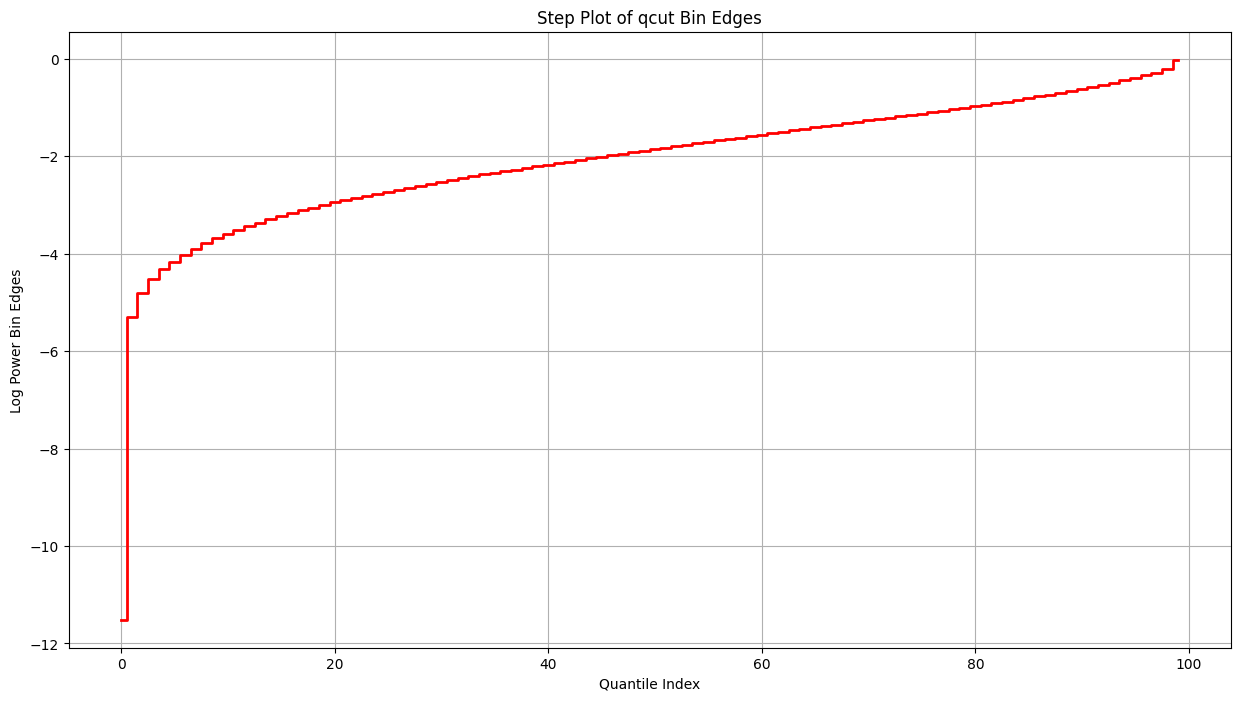

In [7]:
plt.figure(figsize=(15, 8))
plt.step(range(len(bounds)), bounds, color="red", where="mid", linewidth=2)
plt.xlabel("Quantile Index")
plt.ylabel("Log Power Bin Edges")
plt.title("Step Plot of qcut Bin Edges")
plt.grid()
plt.show()


# plots square root power

In [8]:
entsoe_2 = load_entsoe()
train_2, validation_2, test_2 = to_train_validation_test_data(entsoe, "2022-12-31 23:45:00", "2023-12-31 23:45:00")
data_2 = pd.concat([train_2, validation_2])
#data_2 = np.sqrt(data_2['power'])
#sqrt_power = data_2['power'].copy()

Data loaded and transformed successfully. Shape of DataFrame: (78912, 22)
# of training observations: 245472 | 77.77%
# of validation observations: 35040 | 11.10%
# of test observations: 35133 | 11.13%


In [9]:
sqrt_power = np.sqrt(data_2['power'])

In [10]:
_, bounds_2= pd.qcut(sqrt_power, q=99, retbins=True)
bounds_2

array([  0.        ,   9.21954446,  11.74734012,  13.56465997,
        15.        ,  16.24807681,  17.3781472 ,  18.52025918,
        19.6468827 ,  20.63976744,  21.58703314,  22.49444376,
        23.40939982,  24.2899156 ,  25.15949125,  26.        ,
        26.81417536,  27.5680975 ,  28.33725463,  29.10326442,
        29.84962311,  30.61045573,  31.35283081,  32.03123476,
        32.71085447,  33.39161571,  34.07345007,  34.75629439,
        35.48239   ,  36.22154055,  36.91882988,  37.64306045,
        38.36665219,  39.06404997,  39.78693253,  40.47221269,
        41.14608122,  41.84495191,  42.54409477,  43.25505751,
        43.9886349 ,  44.68780594,  45.4202598 ,  46.15192304,
        46.89349635,  47.644517  ,  48.39421453,  49.17316341,
        49.95998399,  50.74445783,  51.51698749,  52.26853738,
        53.08483776,  53.89805191,  54.74486277,  55.57877293,
        56.43580424,  57.26255321,  58.12056435,  59.02541825,
        59.92495307,  60.88513776,  61.78996682,  62.70

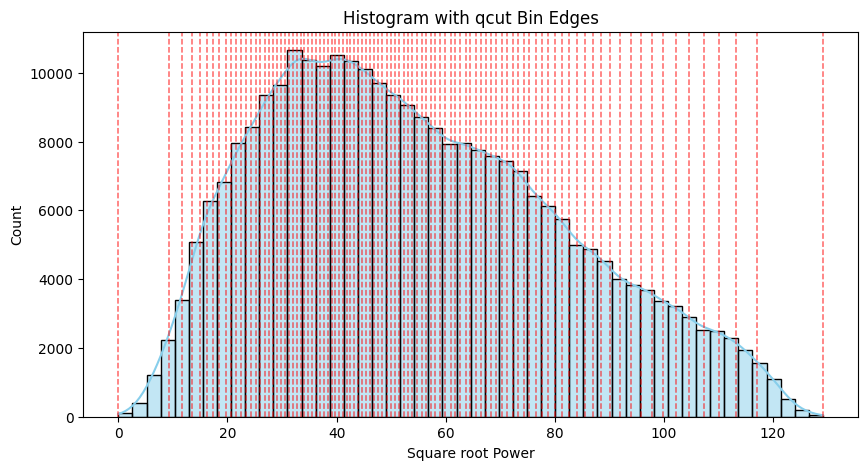

In [11]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(sqrt_power, bins=50, kde=True, color='skyblue', edgecolor='black')

# Overlay bin edges as vertical lines
for edge in bounds_2:
    plt.axvline(edge, color='red', linestyle='dashed', alpha=0.6, linewidth=1.1)

plt.xlabel("Square root Power")
plt.ylabel("Count")
plt.title("Histogram with qcut Bin Edges")
plt.show()

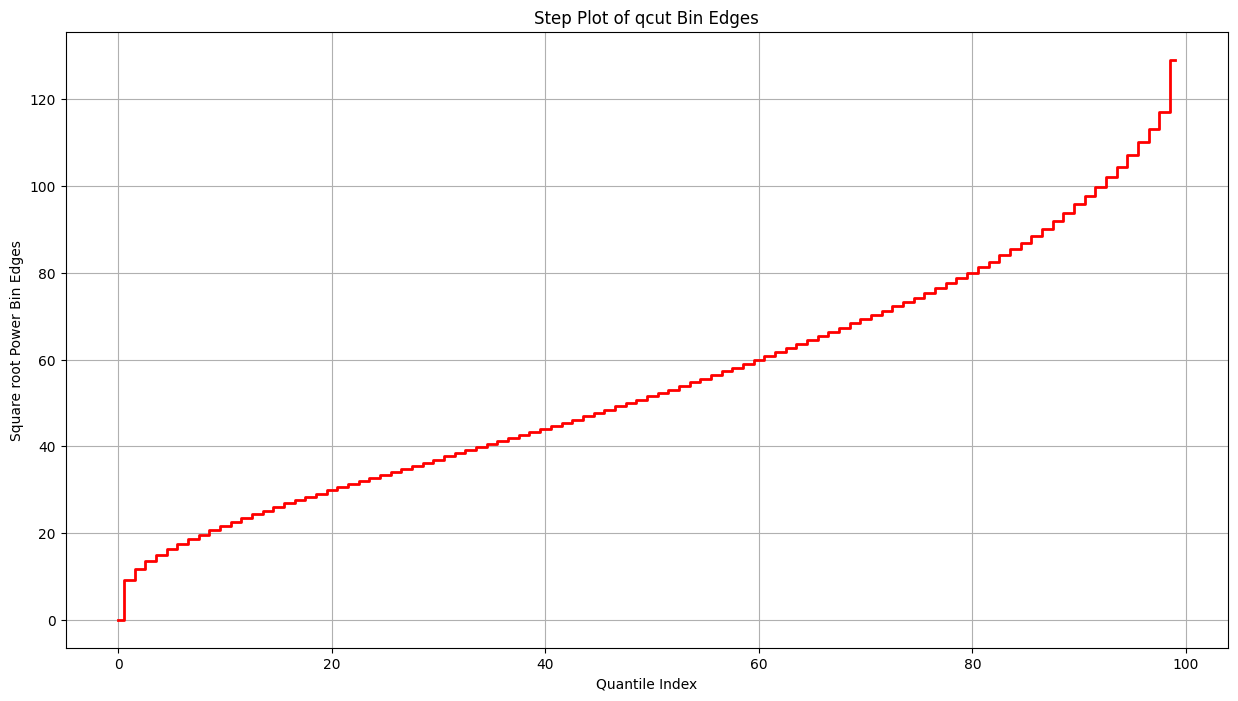

In [12]:
plt.figure(figsize=(15, 8))
plt.step(range(len(bounds_2)), bounds_2, color="red", where="mid", linewidth=2)
plt.xlabel("Quantile Index")
plt.ylabel("Square root Power Bin Edges")
plt.title("Step Plot of qcut Bin Edges")
plt.grid()
plt.show()


# plots log power + epsilon = 1e-3

In [ ]:
entsoe_3 = load_entsoe()
train_3, validation_3, test_3 = to_train_validation_test_data(entsoe, "2022-12-31 23:45:00", "2023-12-31 23:45:00")
data_3 = pd.concat([train_3, validation_3])

Data loaded and transformed successfully. Shape of DataFrame: (78912, 22)
# of training observations: 245472 | 77.77%
# of validation observations: 35040 | 11.10%
# of test observations: 35133 | 11.13%


,power,ws_10m_loc_1,ws_10m_loc_10,ws_10m_loc_2,ws_10m_loc_3,ws_10m_loc_4,ws_10m_loc_5,ws_10m_loc_6,ws_10m_loc_7,ws_10m_loc_8,...,ws_100m_loc_10,ws_100m_loc_2,ws_100m_loc_3,ws_100m_loc_4,ws_100m_loc_5,ws_100m_loc_6,ws_100m_loc_7,ws_100m_loc_8,ws_100m_loc_9,ws_100m_loc_mean
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,1428.0,1.90,2.4800,2.410,1.9700,2.480,1.80,1.800,1.860,2.20,...,5.0500,5.160,4.860,5.710,5.0000,4.4700,4.330,4.2700,5.020,4.5200
2016-01-01 00:15:00,1379.0,1.93,2.5525,2.445,1.9625,2.515,1.78,1.795,1.895,2.21,...,5.1675,5.245,4.825,5.775,4.9575,4.4725,4.365,4.2975,5.075,4.5625
2016-01-01 00:30:00,1399.0,1.96,2.6250,2.480,1.9550,2.550,1.76,1.790,1.930,2.22,...,5.2850,5.330,4.790,5.840,4.9150,4.4750,4.400,4.3250,5.130,4.6050


In [15]:
max_power_value = data_3['power'].max()
max_power_value_rounded = np.ceil(max_power_value / 1000) * 1000
#epsilon = 1e-9
epsilon = 1e-3
data_3['power'] = np.log(data_3['power'] / max_power_value_rounded + epsilon)

In [17]:
log_power_2 = data_3['power']

In [18]:
_, bounds_3= pd.qcut(log_power_2, q=99, retbins=True)
bounds_3

array([-6.90775528, -5.11599581, -4.69754351, -4.43766371, -4.2520309 ,
       -4.10261395, -3.97577752, -3.85486459, -3.74203206, -3.64739885,
       -3.56095197, -3.48138716, -3.40414289, -3.33243983, -3.26399626,
       -3.19993862, -3.1397385 , -3.08552827, -3.03166428, -2.97939585,
       -2.92972424, -2.88030495, -2.83321334, -2.79111217, -2.74979174,
       -2.70922736, -2.66939526, -2.6302725 , -2.58948316, -2.54878656,
       -2.51112984, -2.4727456 , -2.43510859, -2.39948477, -2.36320971,
       -2.32941234, -2.29671997, -2.26336438, -2.23053807, -2.19769528,
       -2.16435886, -2.13309055, -2.10084545, -2.06914183, -2.03750958,
       -2.00597243, -1.97497554, -1.94326659, -1.91173609, -1.88078357,
       -1.85076041, -1.82197613, -1.79117141, -1.76094503, -1.72994524,
       -1.69987762, -1.66943773, -1.64050373, -1.61090958, -1.5801647 ,
       -1.55005974, -1.51841498, -1.48904391, -1.45975096, -1.4307996 ,
       -1.40266289, -1.37366852, -1.34503952, -1.3167683 , -1.28

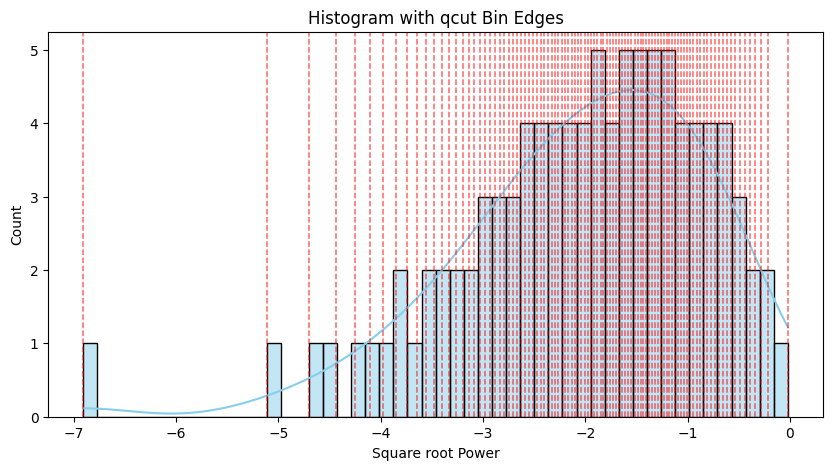

In [19]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(bounds_3, bins=50, kde=True, color='skyblue', edgecolor='black')

# Overlay bin edges as vertical lines
for edge in bounds_3:
    plt.axvline(edge, color='red', linestyle='dashed', alpha=0.6, linewidth=1.1)

plt.xlabel("Square root Power")
plt.ylabel("Count")
plt.title("Histogram with qcut Bin Edges")
plt.show()

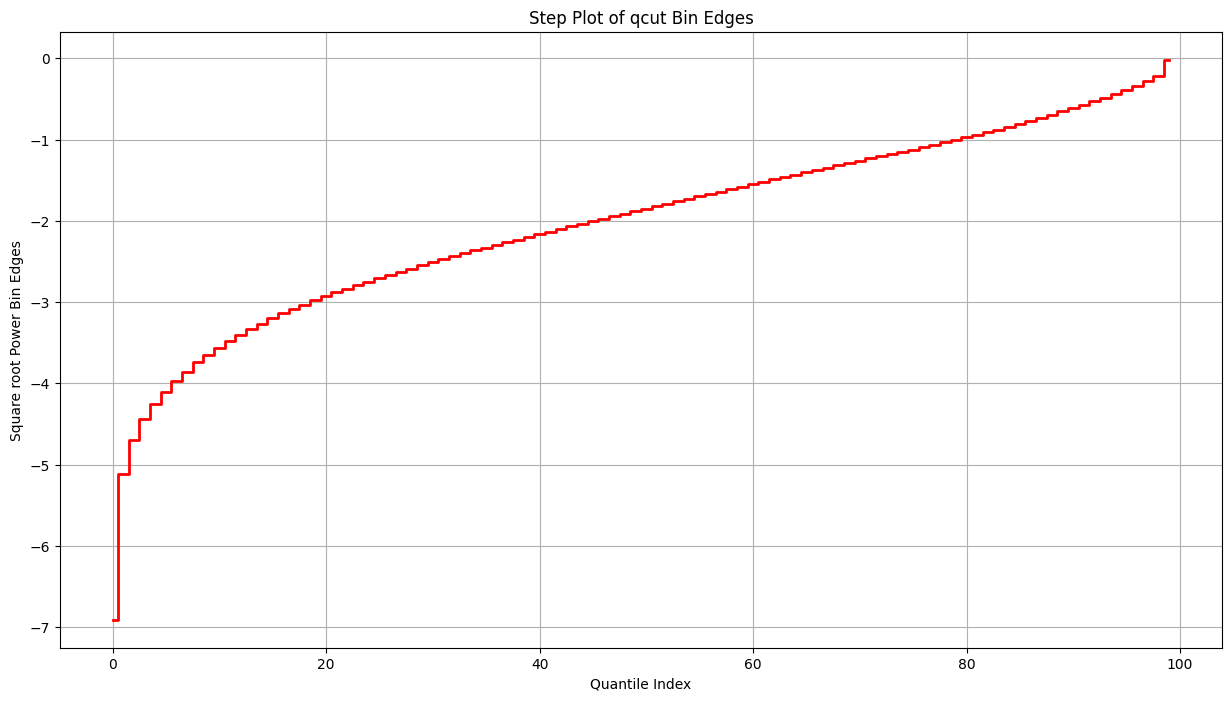

In [20]:
plt.figure(figsize=(15, 8))
plt.step(range(len(bounds_3)), bounds_3, color="red", where="mid", linewidth=2)
plt.xlabel("Quantile Index")
plt.ylabel("Square root Power Bin Edges")
plt.title("Step Plot of qcut Bin Edges")
plt.grid()
plt.show()
